Olá **Cientista**!

Bem vinda e bem vindo ao **projeto do Módulo 02**, neste desafio queremos que você aplique tudo que aprendeu no módulo 1 e 2, analisando dados do [programa de imunização nascional](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def), você pode analisar dados de **imunos** escolhidos por você, pode analisar toda a base de dados, apenas do seu estado ou de estados específicos. Pode analisar as taxas a cobertura ou doses calculadas, buscar outras fontes de informações fora do data SUS, como também, usar outros dados do DataSUS para enriquecer suas análises. 



Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.

**P.S: Vamos agendar um cafezinho para discutir o módulo 2, fique atento para os aviso no DISCORD**

E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook até dia 06/12 às 23h59 (Em breve o formulário para submissão será divulgado).

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



# Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Bibliotecas e configurações

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.ticker as ticker

In [87]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Fonte de Dados

In [88]:
imunizacao_2019 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2019.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2018 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2018.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2017 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2017.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2016 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2016.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2015 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2015.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")
imunizacao_2014 = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/cobertura_vacinal_2014.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=19,thousands=".", decimal=",")

nascimentos = pd.read_csv('https://raw.githubusercontent.com/Igor-Arantes/Bootcamp-Data-Science-Aplicada/master/Dados%20desafio%202/nascimentos_2014_a_2018.csv',
                             encoding="ISO-8859-1",skiprows = 3, sep=";", skipfooter=12,thousands=".", decimal=",")

C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\r9kx\Anaconda3\lib\site-packag

## Funções

In [131]:
def lineplot(dataset,colunas,titulo):
    plt.figure(figsize=(12,8))
    plt.grid(True)
    ax=sns.lineplot(data=dataset.T[colunas], linewidth = 2.5)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
    plt.ylim((0,120))
    plt.legend()
    plt.title(titulo,fontsize=16,pad=10,fontweight="bold")

    plt.show()

## Preparando Bases

Nascimentos

In [89]:
nascimentos.set_index('Região/Unidade da Federação',inplace=True)

Como não há base para 2019, inclui a diferença media aos valores de 2018 para estimar os nascimentos

In [90]:
nascimentos['2019']= nascimentos['2018'] + round(nascimentos[['2014','2015','2016','2017','2018']].diff(axis=1).mean(axis=1),0)

### Bases de Vacinas que se tomam ao nascer

Hepatite B até 30 dias

In [91]:
imuno_hepatiteb = pd.DataFrame()
imuno_hepatiteb['Região/Unidade da Federação'] = imunizacao_2014['Região/Unidade da Federação']
imuno_hepatiteb['2014'] = imunizacao_2014['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2015'] = imunizacao_2015['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2016'] = imunizacao_2016['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2017'] = imunizacao_2017['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2018'] = imunizacao_2018['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb['2019'] = imunizacao_2019['099 Hepatite B  em crianças até 30 dias']
imuno_hepatiteb.set_index('Região/Unidade da Federação',inplace=True)

BCG

In [92]:
imuno_bcg = pd.DataFrame()
imuno_bcg['Região/Unidade da Federação'] = imunizacao_2014['Região/Unidade da Federação']
imuno_bcg['2014'] = imunizacao_2014['072 BCG']
imuno_bcg['2015'] = imunizacao_2015['072 BCG']
imuno_bcg['2016'] = imunizacao_2016['072 BCG']
imuno_bcg['2017'] = imunizacao_2017['072 BCG']
imuno_bcg['2018'] = imunizacao_2018['072 BCG']
imuno_bcg['2019'] = imunizacao_2019['072 BCG']
imuno_bcg.set_index('Região/Unidade da Federação',inplace=True)

# Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

Iniciamos vendo como foi a evolução da cobertura Vacinal de BCG e Hepatite B no total. 

No handles with labels found to put in legend.


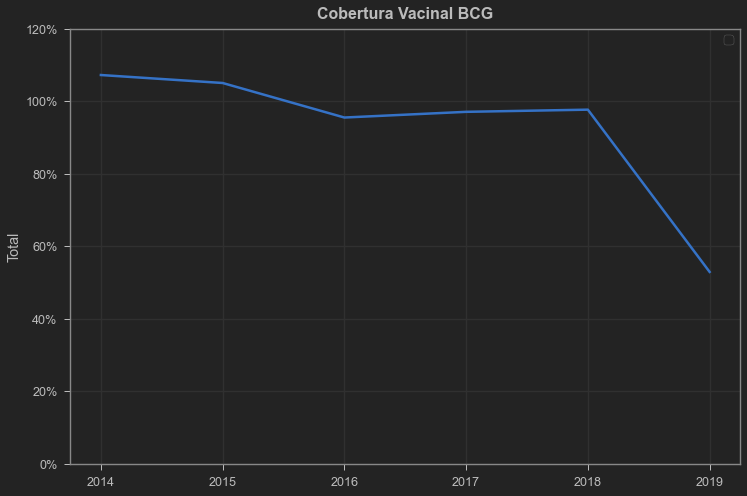

No handles with labels found to put in legend.


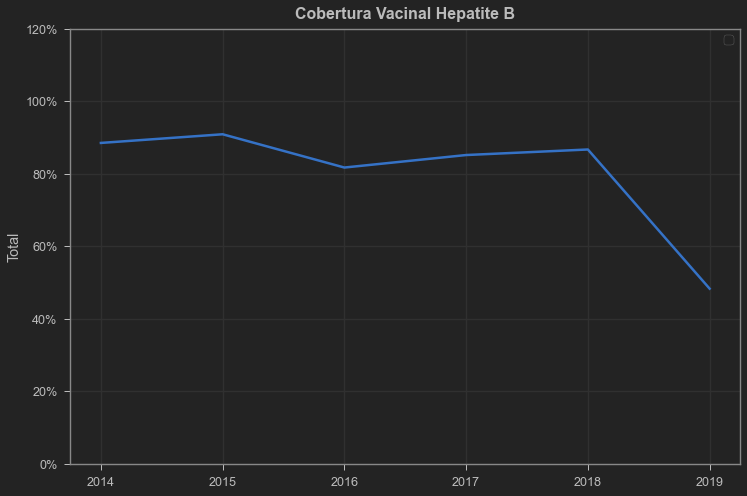

In [132]:
lineplot(imuno_bcg,'Total','Cobertura Vacinal BCG')
lineplot(imuno_hepatiteb,'Total','Cobertura Vacinal Hepatite B')

Notável uma queda expressiva para ambas as vacinas em 2019, mas será que isso foi ocasionado por uma região especifica?

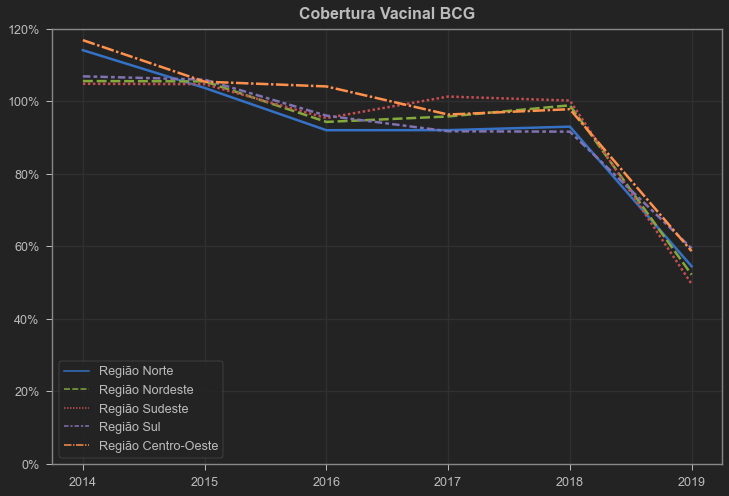

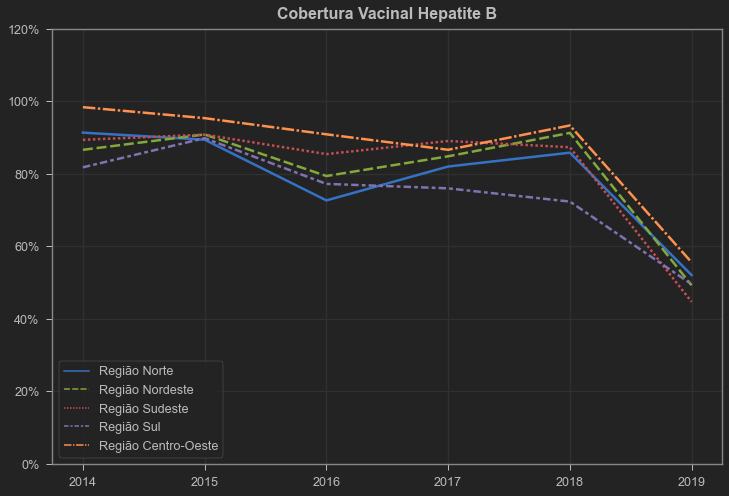

In [135]:
regioes = ['Região Norte','Região Nordeste','Região Sudeste','Região Sul','Região Centro-Oeste']
lineplot(imuno_bcg,regioes,'Cobertura Vacinal BCG')
lineplot(imuno_hepatiteb,regioes,'Cobertura Vacinal Hepatite B')

Apesar de ter algumas diferenças entre as regiões, o comportamente segue o mesmo padrão.  
A hipótese é que os grupos antivacinas conseguiram uma expressividade muito grande ao longo desses anos conseguindo assim convencer as novas mães a não vacinarem seus filhos.